# Basics III
Ok, so we've seen a lot of the functionality that comes built into Python and how we can extend it with modules useful for science like NumPy. Now it's time to start making some real programs. I'll also start describing some of the helpful things that IPython/Jupyter can do that allows you to code faster.

Let's make a program for basic data analysis and plotting. We'll `import` NumPy as well as three new modules for this course, matplotlib, csv and os. Matplotlib gives us the ability to make publication ready figures from our data. In IPython/Jupyter if we want to see graphs in the notebook we additionally need to add the `%matplotlib inline` magic word (more about these later...) at the beginning of our notebook. csv is a library of functions that help you open/read/write files containing delimited data. `os` is a module for operating system dependent functionality.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import csv
import os

## File input

The quickest way to get an array of data contained in a file is to use NumPy's `genfromtxt()` function. You need to supply it a string that gives the file path you want to open. If the file is in the same directory as your notebook, we can use the relative filepath. If it's stored somewhere else you need to use the full filepath.

In addition `genfromtxt()` takes many other optional arguments that help you define the format of the array that you generate. There are a lot of options so if you want to read more about them run `help(numpy.genfromtxt)` or type the command and press `Shift+Tab`.

N.B. Up to now we've been using the `print()` function to read back the contents of a variable. In IPython/Jupyter we actually don't always need it and we can view the contents of a variable by just typing it's name at the end of a cell. When you run the cell, if the last call is to a variable name or unassigned command the values will be automatically printed to the user. The reason we used `print()` earlier was to highlight that if you share you programs as a Python file, .py, the basic interpreter will only read back something to the user when the print function is called.

In [2]:
filepath = r'C:/Users/jball/Documents/James/PythonPrograms/Python_Course/Example1.txt'
# r means raw string, which allows you to differentiate folders in a filepath with a forward slash.
data = np.genfromtxt(filepath, delimiter  = '\t')
data

array([[  1.,   2.],
       [  3.,   4.],
       [  5.,   6.],
       [  7.,   8.],
       [  9.,  10.]])

In [3]:
filepath = 'Example1.txt'
data = np.genfromtxt(filepath, delimiter  = '\t')
data

array([[  1.,   2.],
       [  3.,   4.],
       [  5.,   6.],
       [  7.,   8.],
       [  9.,  10.]])

If your data file has column titles, you can set `names=True` and `genfromtxt` will import them as well. This allows you to index your NumPy array of data with them.

In [4]:
filepath = 'Example2.txt'
data = np.genfromtxt(filepath, delimiter  = '\t', names=True, dtype=float)
data

array([(1.0, 2.0), (3.0, 4.0), (5.0, 6.0), (7.0, 8.0), (9.0, 10.0)], 
      dtype=[('distance', '<f8'), ('time', '<f8')])

In [5]:
data['distance']

array([ 1.,  3.,  5.,  7.,  9.])

If you want to store the names in an array you can use the `dtype.names` method.

In [6]:
names = data.dtype.names
names

('distance', 'time')

Or convert to a numerically indexed array.

In [7]:
num_data = np.concatenate((data['distance'],data['time'])).reshape(len(data),2)
num_data

array([[  1.,   3.],
       [  5.,   7.],
       [  9.,   2.],
       [  4.,   6.],
       [  8.,  10.]])

Sometimes there might be some additional header before the column labels. There's not really a strict rule to automatically decide what is and isn't header for all cases, it will depend on your files and you'll need to determine your own algorithm. If you know the number of header lines, you can cut it from your input by specifiying the number of lines to the `skip_header` argument. 

In [8]:
filepath = 'Example3.txt'
data = np.genfromtxt(filepath, delimiter  = '\t', names=True, skip_header=1, dtype=float)
data

array([(1.0, 2.0), (3.0, 4.0), (5.0, 6.0), (7.0, 8.0), (9.0, 10.0)], 
      dtype=[('distance', '<f8'), ('time', '<f8')])

Or you may want to store it in a variable for later. If it's a string you probably want to specify a delimiter that isn't space or your array will separate the words.

In [9]:
header = np.genfromtxt(filepath, delimiter= '\t', skip_footer=len(data)+1, dtype=str)
header

array('This is the header', 
      dtype='<U18')

For more complicated data file structures that `genfromtxt` can't handle, you can use the `csv` module. First the file is opened with the built-in `open()` function, and then fed into the csv `reader()`.

In [10]:
file = open('Example4.txt')
data_file = csv.reader(file, delimiter='\t')
data_file

This gives us a `csv.reader` object containing our data, but not the data iteself. First we need to feed the data from the object into a list and then `close()` the file. This is important because after we've read the file, the file pointer waits at the end the end. Any subsequent calls to the `csv.reader` object start from the end of the file and return nothing.

In [11]:
lines = [row for row in data_file]
file.close()

We now have a list of lists where each sub-list is a line from the file.

In [12]:
lines

[['This is the header'],
 ['Here is some more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['And more'],
 ['distance', 'time'],
 ['1', '2'],
 ['3', '4'],
 ['5', '6'],
 ['7', '8'],
 ['9', '10']]

To determine what's header and what's data without having to count by hand we can iterate through the lines setting the rule that if all the elements in a line can be converted to floats then it's data, else it's header. Normally converting text to a float gives an error and stops the program. Therefore, instead of conditional statements we'll use exception handling so the code knows what to do in the case of an error.

In [13]:
data = []
header = []
for line in lines:
    try:
        data.append([float(item) for item in line])
    except ValueError:
        header.append(line)

data = np.array(data)

try:
    labels = header[-1]
except IndexError:
    labels = []

print(header)
print(labels)
print(data)

[['This is the header'], ['Here is some more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['distance', 'time']]
['distance', 'time']
[[  1.   2.]
 [  3.   4.]
 [  5.   6.]
 [  7.   8.]
 [  9.  10.]]


If we're planning on opening many files this way, rather than typing all of this out every time, it's more efficient if we put all of these commands into a function and use the function many times.

In [14]:
def load_data(filepath):
    """
    Returns a NumPy array of data, a list of header lines, and column labels from a data file. 
    """
    
    file = open(filepath)
    data_file = csv.reader(file, delimiter='\t')
    lines = [row for row in data_file]
    file.close()
    
    data = []
    header = []
    for line in lines:
        try:
            data.append([float(item) for item in line])
        except ValueError:
            header.append(line)
    
    try:
        labels = header[-1]
    except IndexError:
        labels = []
    
    data = np.array(data)
    
    return header, labels, data


loaded_data = load_data('Example4.txt')

header = loaded_data[0]
labels = loaded_data[1]
data = loaded_data[2]

print(header)
print(labels)
print(data)

[['This is the header'], ['Here is some more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['And more'], ['distance', 'time']]
['distance', 'time']
[[  1.   2.]
 [  3.   4.]
 [  5.   6.]
 [  7.   8.]
 [  9.  10.]]


## Plotting
Now we know how to get our data into Jupyter, we want to take a look at it. Let's load some interesting data with our `load_data()` function.

In [15]:
filepath = 'data3.txt'
loaded_data = load_data(filepath)
labels = loaded_data[1]
data = loaded_data[2]

Basic plotting is very simple, we just use matplotlib's `pyplot.plot()` function.

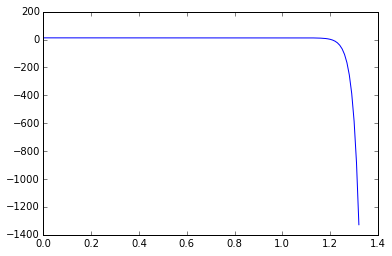

In [16]:
plt.pyplot.plot(data[:,0],data[:,1])

Plotting tools in matplotlib have many options to customise graphs however you like. See `help(plt.pyplot.plot)` for a full list. As a quick example, let's try the following:

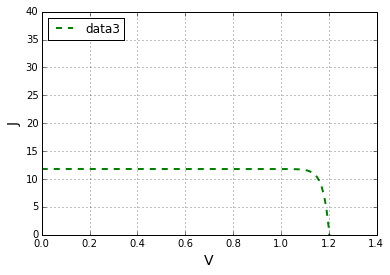

In [17]:
plt.pyplot.plot(data[:,0],data[:,1], label=filepath.strip('.txt'), linestyle='--', color='green',linewidth=2.0)
plt.pyplot.xlabel(labels[0], size=14)
plt.pyplot.ylabel(labels[1], size=14)
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.grid(True)
plt.pyplot.legend(loc=2)

We can load a second data set and plot it on the same graph,...

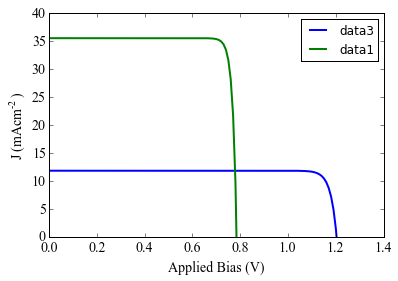

In [18]:
filepath1 = 'data1.txt'
loaded_data1 = load_data(filepath1)
labels1 = loaded_data1[1]
data1 = loaded_data1[2]

plt.pyplot.plot(data[:,0],data[:,1], label=filepath.strip('.txt'),linewidth=2.0)
plt.pyplot.plot(data1[:,0],data1[:,1], label=filepath1.strip('.txt'),linewidth=2.0)
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.xticks(size=14, **{'fontname':'Times New Roman'})
plt.pyplot.yticks(size=14, **{'fontname':'Times New Roman'})
plt.pyplot.xlabel('Applied Bias (V)', size=14, **{'fontname':'Times New Roman'})
plt.pyplot.ylabel('$\mathregular{J\ (mAcm^{-2})}$', size=14, **{'fontname':'Times New Roman'})
plt.pyplot.legend(loc=0) # finds best location

...on different plots using the `subplot()` method. The argument for `subplot()` is three numbers concatenated that represent the number of rows of subplots, number of columns of subplots, and the figure number of the subplot.

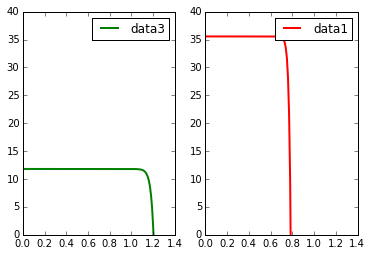

In [19]:
plt.pyplot.subplot(121)
plt.pyplot.plot(data[:,0],data[:,1], label=filepath.strip('.txt'), color='green', linewidth=2.0)
# color can be arbitrarily customised using RGB values i.e. color = (R,G,B) where R,G, and B are values
# between 0-1. Optionally, color can also accept standard html color arguments as code or names. A table
# of values can be found at http://www.w3schools.com/html/html_colornames.asp.
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.legend(loc=1)

plt.pyplot.subplot(122)
plt.pyplot.plot(data1[:,0],data1[:,1], label=filepath1.strip('.txt'), color='red', linewidth=2.0)
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.legend(loc=1)

Or as completely separate figures using the `figure()` method.

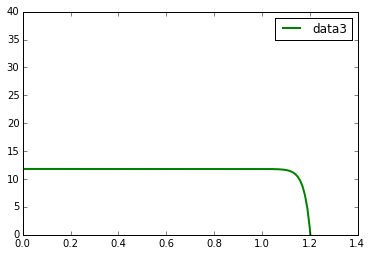

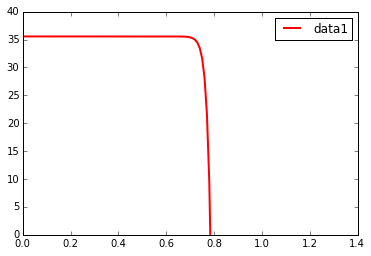

In [20]:
plt.pyplot.figure(0)
plt.pyplot.plot(data[:,0],data[:,1], label=filepath.strip('.txt'), color='green', linewidth=2.0)
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.legend(loc=1)

plt.pyplot.figure(1)
plt.pyplot.plot(data1[:,0],data1[:,1], label=filepath1.strip('.txt'), color='red', linewidth=2.0)
plt.pyplot.axis([0, 1.4, 0, 40])
plt.pyplot.legend(loc=1)

Obviously we don't want to type out all of customisation every time. Let's turn it into a fuction.

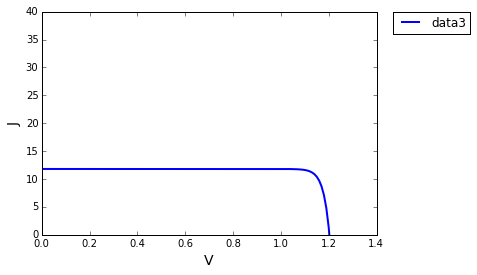

In [21]:
def custom_xy_line(data, filepath):
    """
    Custom line graph.
    """
    
    plt.pyplot.plot(data[:,0],data[:,1], label=filepath.strip('.txt'), linestyle='-',linewidth=2.0)
    plt.pyplot.xlabel(labels[0], size=14)
    plt.pyplot.ylabel(labels[1], size=14)
    plt.pyplot.axis([0, 1.4, 0, 40])
    plt.pyplot.grid(False)
    plt.pyplot.legend(loc=2, bbox_to_anchor = (1.05,1), borderaxespad=0.)

custom_xy_line(data, filepath)

But what if you've got loads of data files to plot? Of course, we iterate! Let's start by making a list of all of the data files in a directory.

In [22]:
folderpath = r'C:/Users/jball/Documents/James/PythonPrograms/Python_Course/'
os.chdir(folderpath)
files = [f for f in os.listdir(folderpath) if os.path.isfile(os.path.join(folderpath,f)) and f.startswith('data')]
files

['data0.txt',
 'data1.txt',
 'data10.txt',
 'data2.txt',
 'data3.txt',
 'data4.txt',
 'data5.txt',
 'data6.txt',
 'data7.txt',
 'data8.txt',
 'data9.txt']

Now we can make a list of the data contained in each file with a `for` loop.

In [23]:
data_list = []
for f in files:
    loaded_data = load_data(f)
    data_list.append(loaded_data[2])

data_list[0]

array([[  0.00000000e+00,   3.19288700e+01],
       [  1.00000000e-02,   3.19288700e+01],
       [  2.00000000e-02,   3.19288700e+01],
       [  3.00000000e-02,   3.19288700e+01],
       [  4.00000000e-02,   3.19288700e+01],
       [  5.00000000e-02,   3.19288700e+01],
       [  6.00000000e-02,   3.19288700e+01],
       [  7.00000000e-02,   3.19288700e+01],
       [  8.00000000e-02,   3.19288700e+01],
       [  9.00000000e-02,   3.19288700e+01],
       [  1.00000000e-01,   3.19288700e+01],
       [  1.10000000e-01,   3.19288700e+01],
       [  1.20000000e-01,   3.19288700e+01],
       [  1.30000000e-01,   3.19288700e+01],
       [  1.40000000e-01,   3.19288700e+01],
       [  1.50000000e-01,   3.19288700e+01],
       [  1.60000000e-01,   3.19288700e+01],
       [  1.70000000e-01,   3.19288700e+01],
       [  1.80000000e-01,   3.19288700e+01],
       [  1.90000000e-01,   3.19288700e+01],
       [  2.00000000e-01,   3.19288700e+01],
       [  2.10000000e-01,   3.19288700e+01],
       [  

And then plot all the data on one graph.

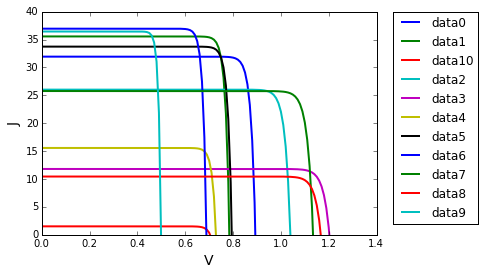

In [24]:
for i in range(len(files)):
    custom_xy_line(data_list[i], files[i])

And as always, we don't want to type that out every time so let's make another function to do it all for us.

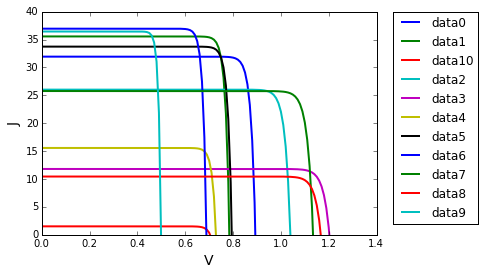

In [25]:
def data_analysis(folderpath):
    """
    Load all the data files from a folder and plot it all on one graph.
    """
    
    folderpath = r'C:/Users/jball/Documents/James/PythonPrograms/Python_Course/'
    os.chdir(folderpath)
    files = [f for f in os.listdir(folderpath) if os.path.isfile(os.path.join(folderpath,f)) and f.startswith('data')]
    
    data_list = []
    for f in files:
        loaded_data = load_data(f)
        data_list.append(loaded_data[2])
    
    for i in range(len(files)):
        custom_xy_line(data_list[i], files[i])

folderpath = r'C:/Users/jball/Documents/James/PythonPrograms/Python_Course/'
data_analysis(folderpath)

## Saving data and plots
Finally, after we've done our analysis, we need to export our graphs if we want to publish them. We may also have done some further processing of our raw data that we want to keep for future reference. Let's start by saving the data to a text file using NumPy's `savetxt()` function.

In [26]:
data = np.array([[1,2],[3,4],[5,6],[7,8]])
np.savetxt('Processed_data.txt', data, fmt='%.4f', newline='\r\n', delimiter = '\t')

If we want, we can also add new column names.

In [27]:
header = np.array(['distance','time'])
header_data = np.vstack((header,data.astype('<U8')))
np.savetxt('Processed_data_header.txt', header_data, fmt= '%s', newline='\r\n', delimiter = '\t')

To export graphs, we can use pyplots `save()` method. Typical file types are supported such as png, pdf, ps, eps and svg.

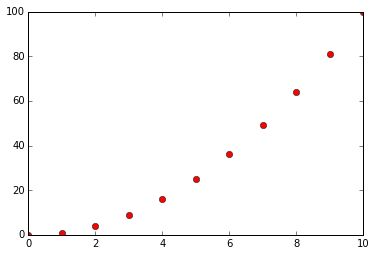

In [28]:
x = np.arange(0,11)
y = x**2
plt.pyplot.plot(x, y, 'ro')
plt.pyplot.savefig('figure1.png', dpi=600)

##  More Plotting Examples
Matplotlib can do a lot more than line and scatter plots. Here are some exmaples.

C:\Users\jball\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


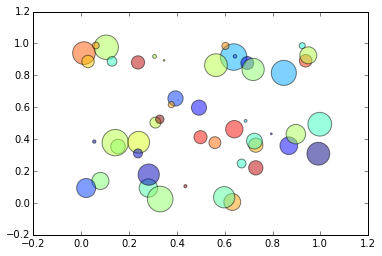

In [29]:
# assign additional variables to scatter plot features

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.pyplot.scatter(x, y, s=area, c=colors, alpha=0.5) # alpha sets transparency between 0-1. 1 is opaque, 0 is transparent

C:\Users\jball\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


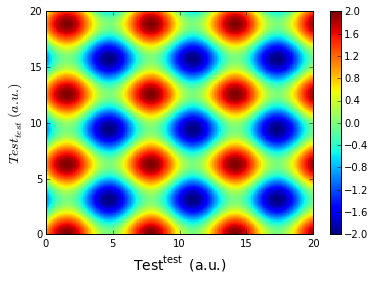

In [30]:
x = np.arange(0,20.1,0.1)
y = np.arange(0,20.1,0.1)
x,y = np.meshgrid(x,y)
z = np.sin(x) + np.cos(y)

plt.pyplot.pcolor(x,y,z, cmap='jet')
plt.pyplot.colorbar()

# Use LaTeX formating for axis labels
plt.pyplot.ylabel('$Test_{test}\ (a.u.)$',fontsize=14)
plt.pyplot.xlabel('$\mathregular{Test^{test}\ (a.u.)}$',fontsize=14)

C:\Users\jball\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


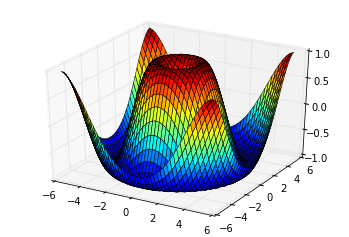

In [31]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(-5.5,5.75,0.25)
y = np.arange(-5.5,5.75,0.25)
x,y = np.meshgrid(x,y)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

# Create a figure and add 3d axes to it
fig = plt.pyplot.figure()
ax = fig.gca(projection='3d')

# Add surface plot to figure
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap='jet', linewidth=0.5)

## Further reading
There are loads of examples on the matplotlib website, http://matplotlib.org/gallery.html, of more or less every type of graph you can think of. That's a good place to start if you're not sure about how to make a new style of plot. 